In [109]:
%matplotlib inline

import pandas as pd
import numpy as np
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
#from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [111]:
from sklearn import metrics

# Classification tree
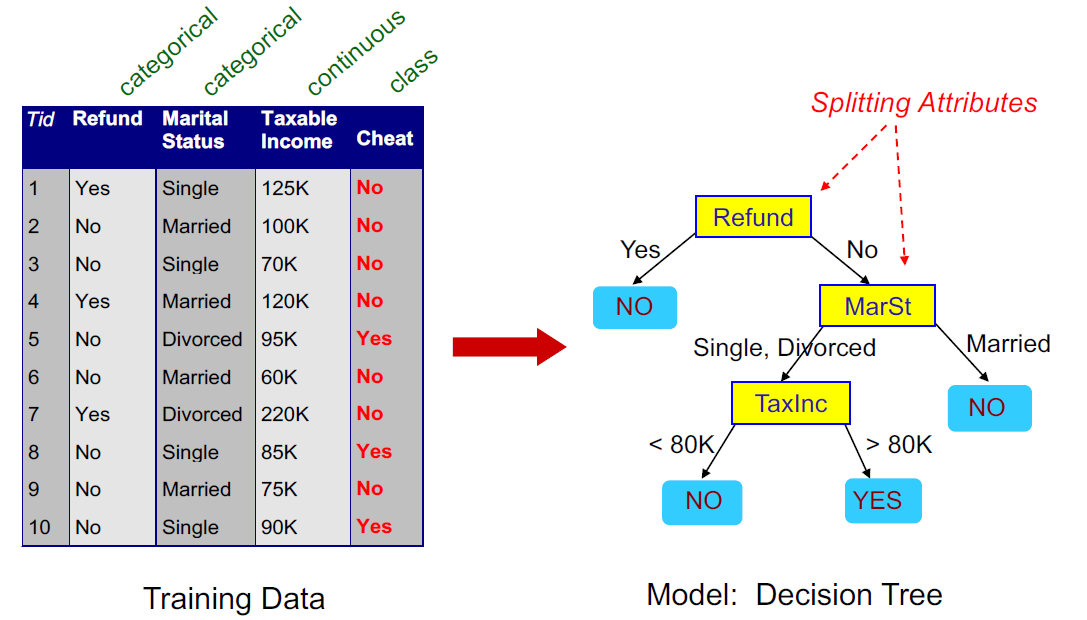

# DecisionTreeClassifier

##### data

In [112]:
mower_df = pd.read_csv('./data/RidingMowers.csv')
print(mower_df.shape)
mower_df.head()

(24, 3)


,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


## Explore sklearn decisiontreeclassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

어떤 attribute, method 있는지 링크 들어가서 대충 설명해주면 좋을 듯
- criterion: gini, entropy
- splitter: 
- max_depth: 
- min_samples_split: 

gini VS entropy

sklearn은 optimized CART 알고리즘을 활용

#### Import decisiontreeclassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

그냥 decisiontree 모듈 탐색용으로 train, test 생략

In [25]:
X = mower_df.drop(columns=['Ownership'])
y = mower_df['Ownership']

##### Learn decision tree

In [26]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

##### Performance evaluation

In [27]:
accuracy_score(y, tree.predict(X))

1.0

당연히 1.0임, 아무 제약을 두지않고 tree를 만들어서, 학습에 사용한 데이터 그대로 예측한 다음에 accuracy를 측정한 것이기 때문에

##### Learn decision tree with max_depth = 2

In [28]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=2)

##### Performance evaluation for model with max_depth = 2

In [29]:
accuracy_score(y, tree.predict(X))

0.8333333333333334

## visualization

In [30]:
from sklearn.tree import export_graphviz
import graphviz

##### depth=2인 tree를 visualization해보시오.

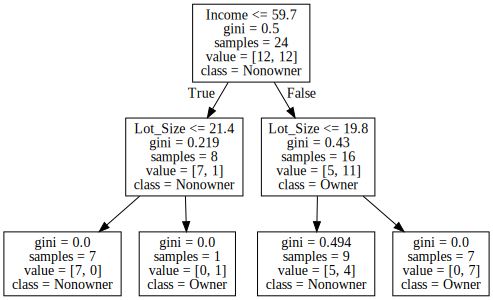

In [31]:
# DOT data
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=tree.classes_)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

The order of the `values` vector in the boxes is the same as `dt.classes_`.

##### full depth tree를 visualization해보시오.

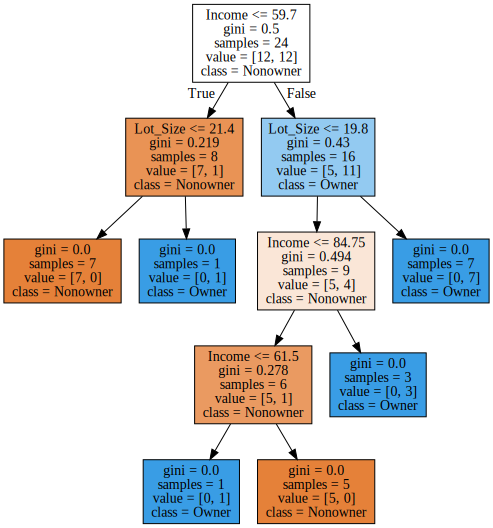

In [32]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

# DOT data
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=tree.classes_,
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [33]:
def plotDecisionTree(decisionTree, feature_names=None, class_names=None, impurity=False, label='root',
                     max_depth=None, rotate=False, pdfFile=None):
    """ Create a plot of the scikit-learn decision tree and show in the Jupyter notebooke 
    Input:
        decisionTree: scikit-learn decision tree
        feature_names (optional): variable names
        class_names (optional): class names, only relevant for classification trees
        impurity (optional): show node impurity
        label (optional): only show labels at the root
        max_depth (optional): limit 
        rotate (optional): rotate the layout of the graph
        pdfFile (optional): provide pathname to create a PDF file of the graph
    """
    if pydotplus is None:
        return 'You need to install pydotplus to visualize decision trees'
    #if Image is None:
    #    return 'You need to install ipython to visualize decision trees'
    if class_names is not None:
        class_names = [str(s) for s in class_names]  # convert to strings
    dot_data = io.StringIO()
    export_graphviz(decisionTree, feature_names=feature_names, class_names=class_names, impurity=impurity,
                    label=label, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                    max_depth=max_depth, rotate=rotate)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    if pdfFile is not None:
        graph.write_pdf(str(pdfFile))
    return Image(graph.create_png())


# Exercise

## Data

In [34]:
bank_df = pd.read_csv('./data/UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [35]:
bank_df.shape

(5000, 12)

##### X, y 나누기

In [36]:
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

##### train : valid = 6 : 4로 나누기

In [37]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print(train_X.shape, valid_X.shape)

(3000, 11) (2000, 11)


tree에서는 normalize 안 해줘도 됨! 이 내용 언급하고 넘어가기

## Learn model

##### full tree를 학습해보시오. (fit)

In [38]:
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

DecisionTreeClassifier()

##### 학습한 full tree를 시각화해보시오.

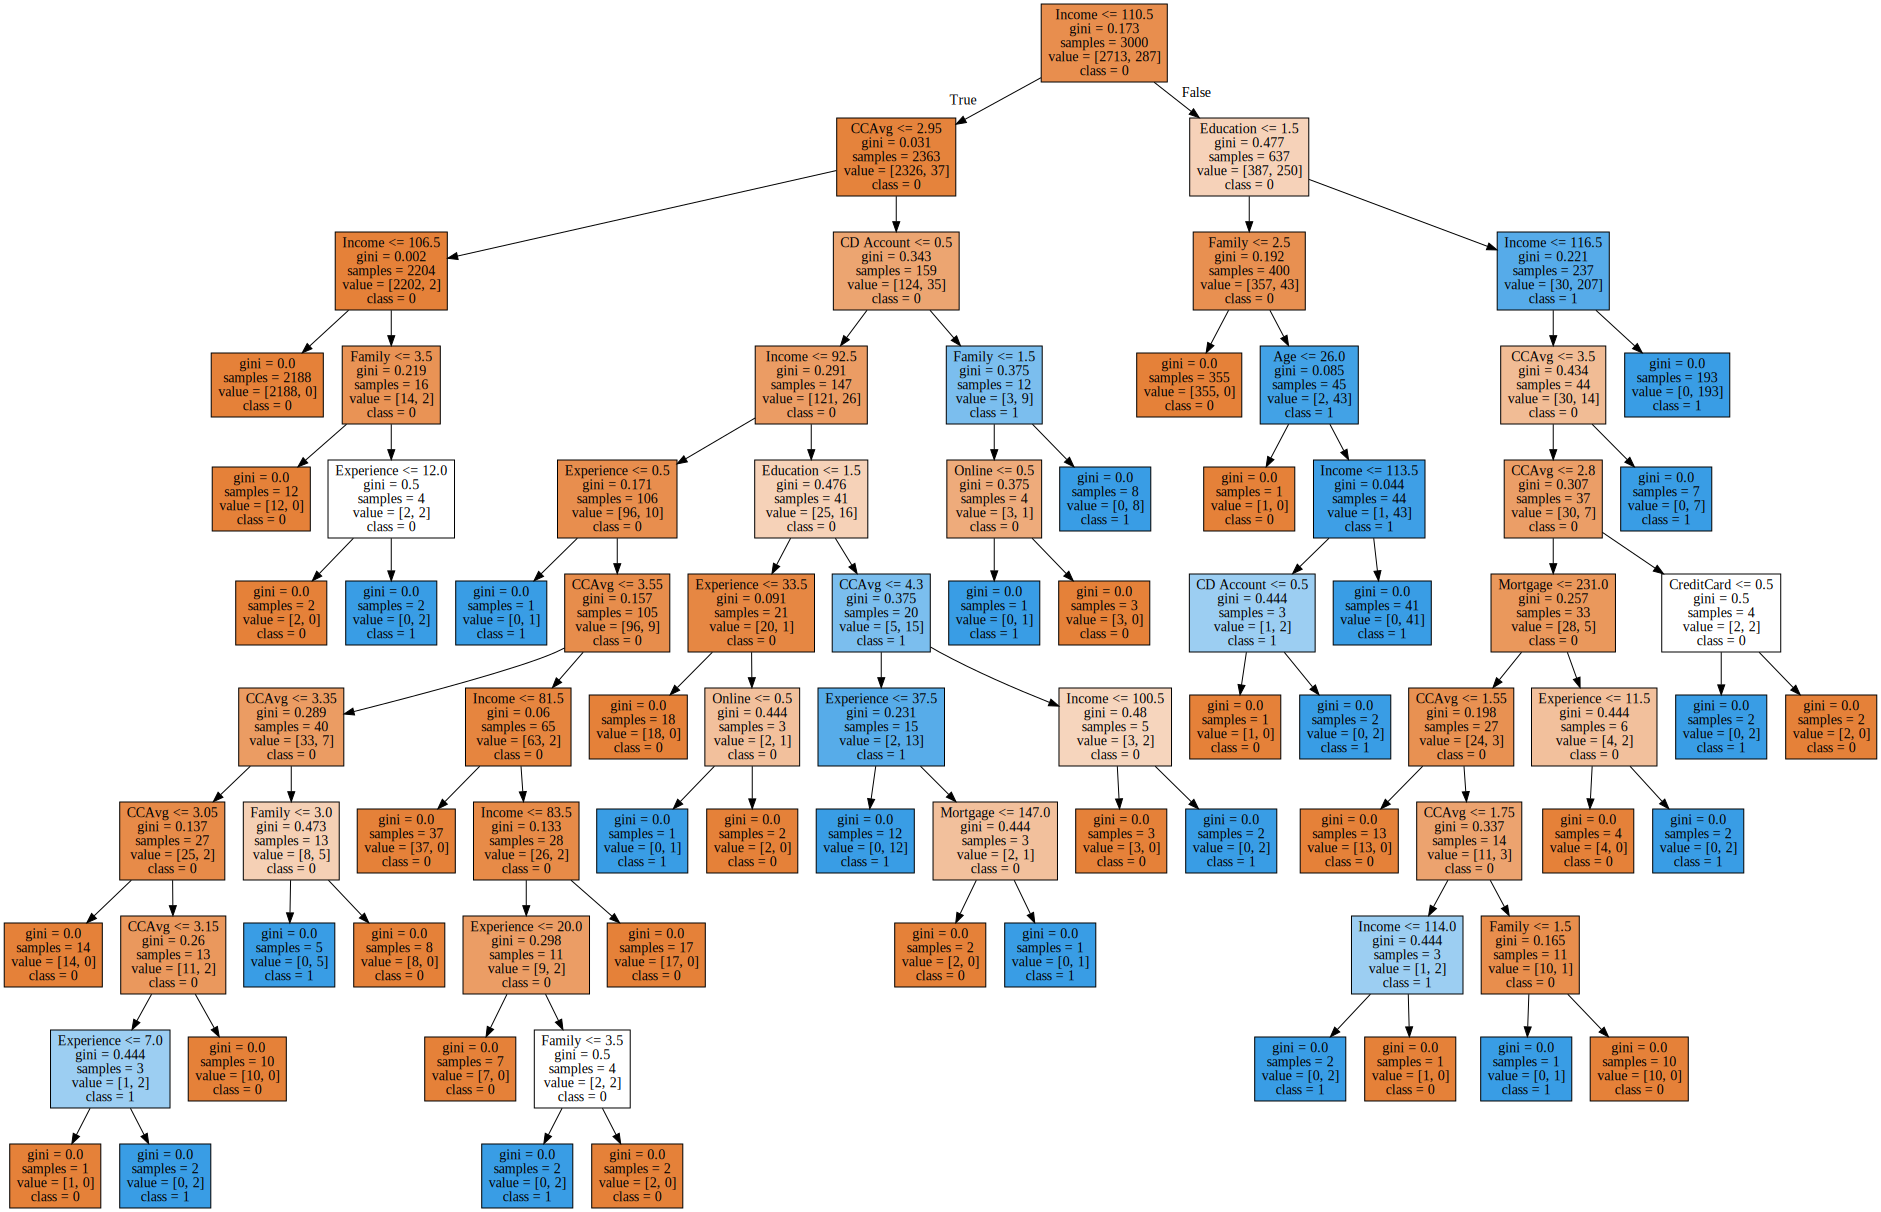

In [39]:
# DOT data
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=tree.classes_.astype(str),
                           filled=True) # class_name에는 string 형태의 데이터만 가능해서 타입변경 필요

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

##### notebook 상에 띄우지 말고 export 하려면?

In [40]:
import pydotplus

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("fulltree.png")

True

# Performance analysis

##### 이렇게 깊게 만든 tree도 좋은 모델일까?

In [44]:
print("accuracy: ", accuracy_score(train_y, tree.predict(train_X)))
print("\nconfusion matrix:")
print(confusion_matrix(train_y, tree.predict(train_X), labels=[0, 1]))

accuracy:  1.0

confusion matrix:
[[2713    0]
 [   0  287]]


train set 평가 결과는 당연히 100%! (왜냐하면 full tree로 마지막 남은 하나의 데이터까지 다 분류했으니까) <br>
valid set에 대해서 평가를 해보면

In [45]:
print("accuracy: ", accuracy_score(valid_y, tree.predict(valid_X)))
print("\nconfusion matrix:")
print(confusion_matrix(valid_y, tree.predict(valid_X), labels=[0, 1]))

accuracy:  0.9795

confusion matrix:
[[1792   15]
 [  26  167]]


valid set에 대해서도 성능이 좋음! (tree는 이런식으로 depth를 깊게 하면 성능이 좋은 경우가 많더라 (그냥 내 경험상)) <br>
근데 depth가 깊은 모델일수록 해석은 어려움 -> feature importance를 이용할 수 있음!

##### feature importance 확인하기 (feature_importances_)

Importance 구하는 것 설명

In [50]:
pd.DataFrame(tree.feature_importances_, 
             index = bank_df.drop("Personal Loan", axis=1).columns, 
             columns = ["importance"]).sort_values(by="importance", ascending=False)

,importance
Income,0.359140
Education,0.355846
Family,0.168382
CCAvg,0.061200
Experience,0.022412
CD Account,0.016610
Online,0.005458
CreditCard,0.003853
Age,0.003598
Mortgage,0.003503


Income, Education, Family 정도가 유의한 변수처럼 보임 - 엄밀한건 아닌데, 이렇게 설명해도 될지는 좀 생각해보고 해야 할 듯

## Cross-validation
k-fold cross-validation
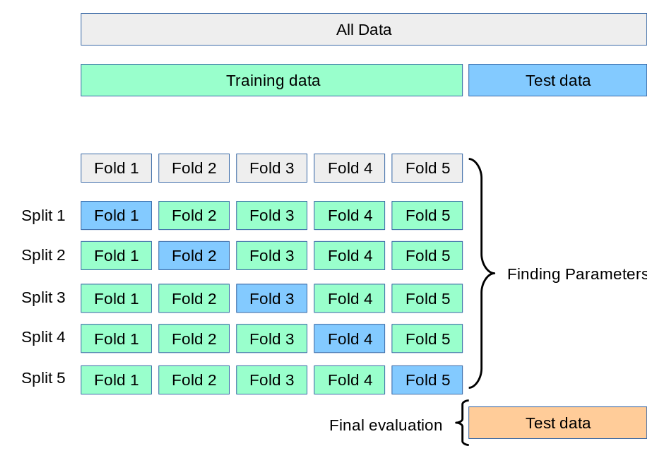

원래는 이게 가장 일반적으로 사용하는 cross-validation 방법임 <br>
우리가 지금까지 한 방식은 그냥 약식으로 한 것임 이때 scaling 어떻게 해주는지도 같이 설명해야 할 듯

##### import cross_val_score module

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
# Five-fold cross-validation of the full decision tree classifier
tree = DecisionTreeClassifier()

scores = cross_val_score(tree, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f}')

Accuracy scores of each fold:  ['0.982', '0.968', '0.993', '0.987', '0.990']
Accuracy: 0.984


##### small tree에 대해 같은 방식으로 평가해보면? (max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)

각 파라미터 의미 좀 알아보고 가야 할 듯

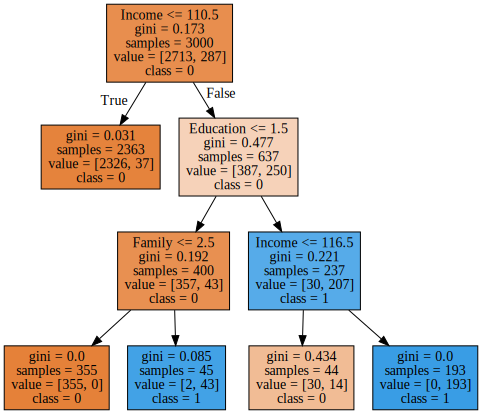

In [59]:
smalltree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smalltree.fit(train_X, train_y)

# DOT data
dot_data = export_graphviz(smalltree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=smalltree.classes_.astype(str),
                           filled=True) # class_name에는 string 형태의 데이터만 가능해서 타입변경 필요

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [60]:
# Five-fold cross-validation of the full decision tree classifier
scores = cross_val_score(smalltree, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.982', '0.967', '0.983', '0.983', '0.983']
Accuracy: 0.980 (+/- 0.013)
Accuracy: 0.980 (+/- 0.007)


작은 tree로도 충분히 accuracy가 높은 것을 확인할 수 있음

## Grid search
여러 파라미터에 대해서 실험해서 좋은 파라미터를 선택할 수 있도록 하는 방법
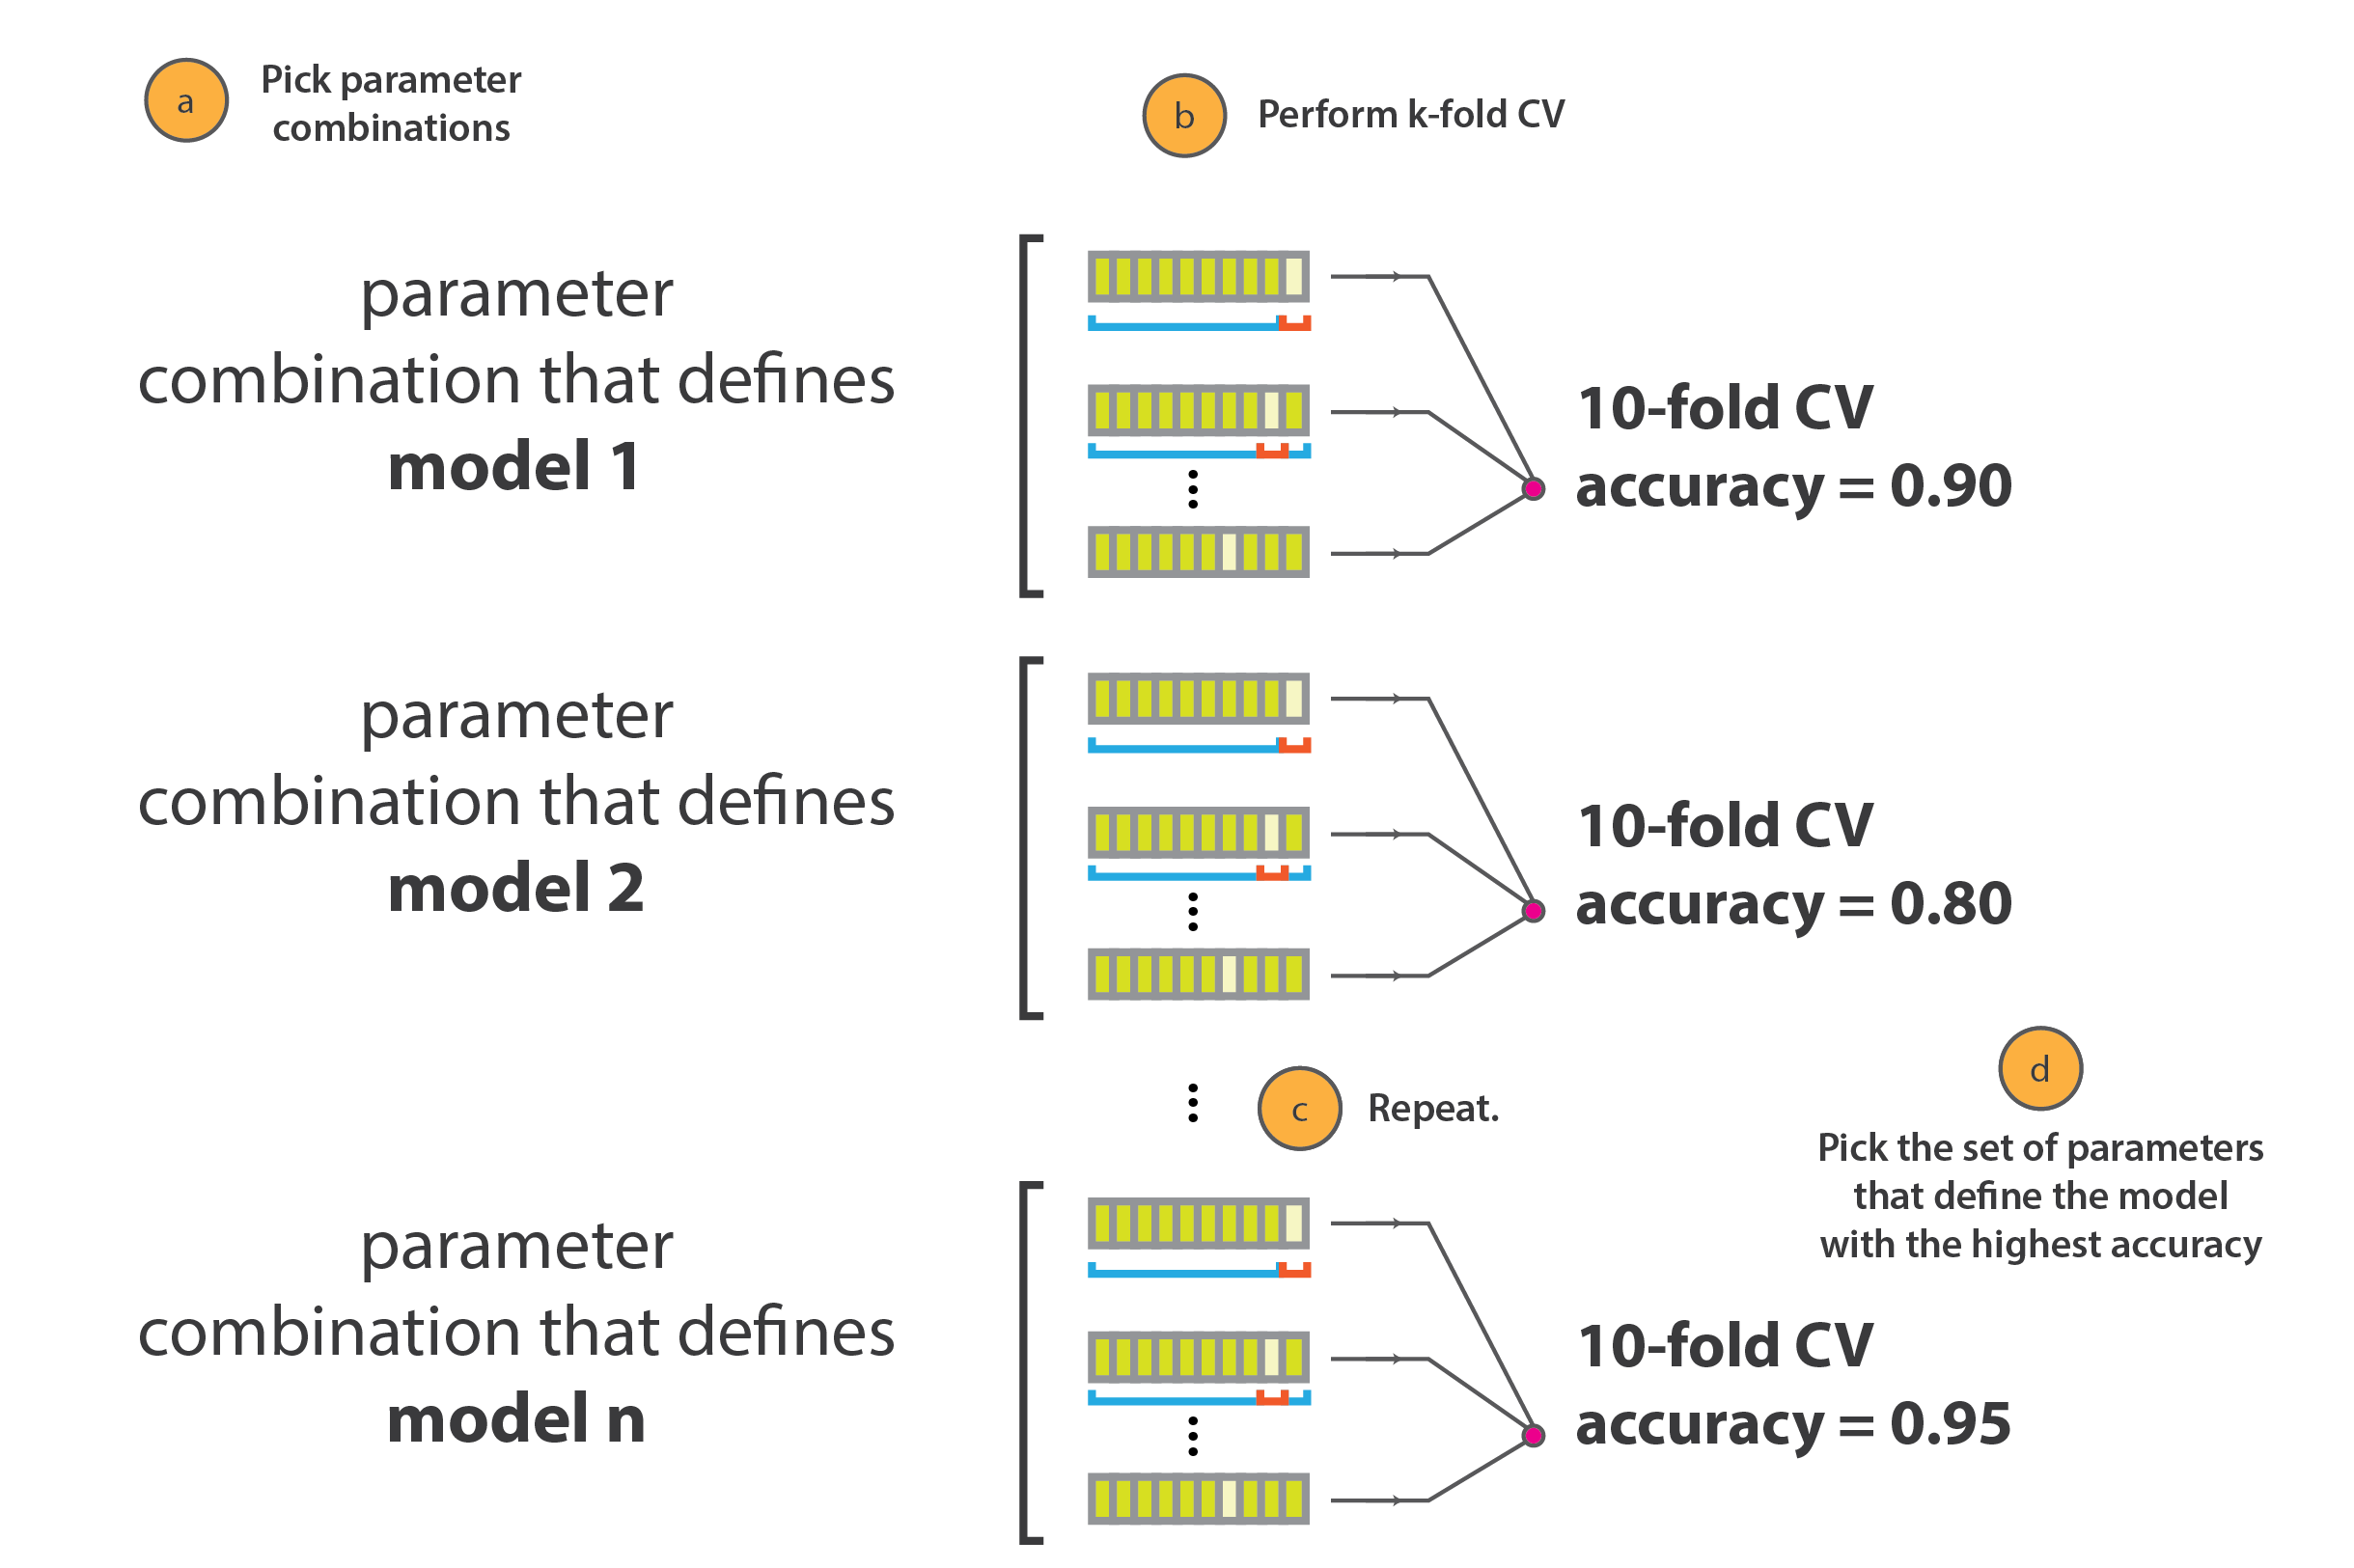

##### import  GridSearchCV module

In [61]:
from sklearn.model_selection import GridSearchCV

## Table 9.6

##### 일단 임의로 파라미터 몇 개를 정해서 결과를 확인해본다.

In [77]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.9866666666666667
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


##### 앞에서 제일 좋은 성능을 보였던 파라미터 몇 개를 중심으로 더 촘촘하게 값을 변화시켜가며 확인해본다.

In [82]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(8, 12)), 
    'min_samples_split': list(range(15, 25)), 
    'min_impurity_decrease': [0, 0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.9883333333333333
Improved parameters:  {'max_depth': 8, 'min_impurity_decrease': 0, 'min_samples_split': 16}


아주 약간이지만.. 성능이 좋아졌음

##### 가장 좋은 성능을 보인다고 판단된 tree를 그려보자.

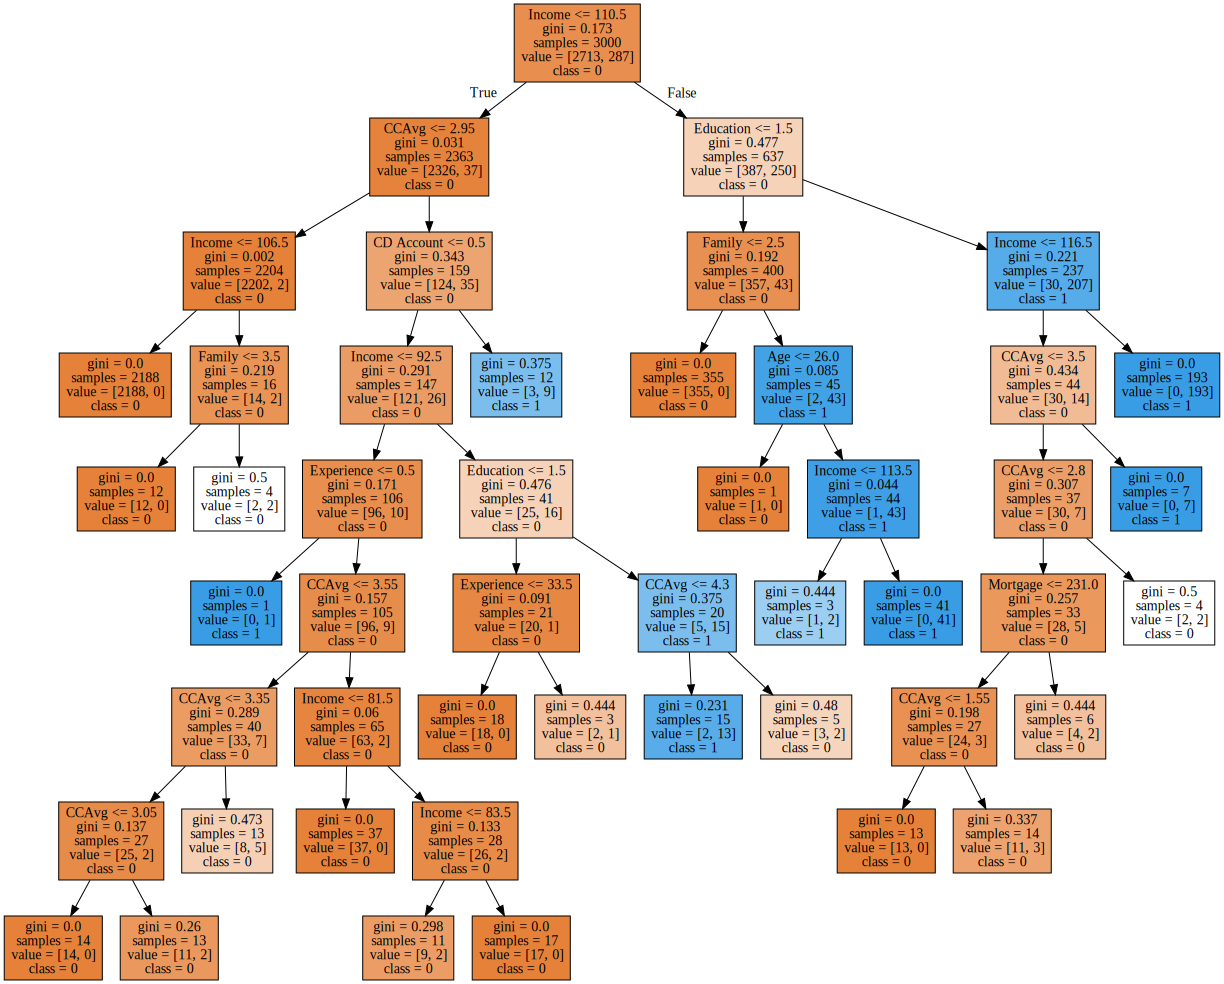

In [83]:
# DOT data
dot_data = export_graphviz(bestClassTree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=bestClassTree.classes_.astype(str),
                           filled=True) # class_name에는 string 형태의 데이터만 가능해서 타입변경 필요

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

##### 가장 좋은 성능을 보인다고 판단된 tree를 이용해 train set과 validation set 각각에 대해 confusion matrix와 accuracy를 구해보자.

In [84]:
print("train accuracy: ", accuracy_score(train_y, bestClassTree.predict(train_X)))
print("")
print(" confusion matrix:")
print(confusion_matrix(train_y, bestClassTree.predict(train_X), labels=[0, 1]))

print("\nvalid accuracy: ", accuracy_score(valid_y, bestClassTree.predict(valid_X)))
print("")
print(" confusion matrix:")
print(confusion_matrix(valid_y, bestClassTree.predict(valid_X), labels=[0, 1]))

train accuracy:  0.991

 confusion matrix:
[[2707    6]
 [  21  266]]

valid accuracy:  0.9825

 confusion matrix:
[[1796   11]
 [  24  169]]


# Regression tree
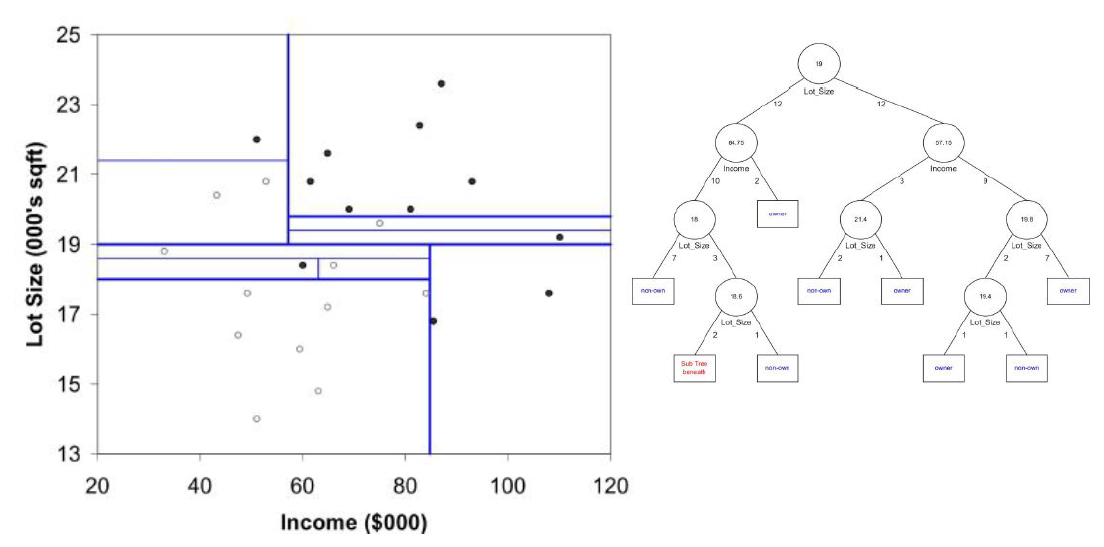

##### data

In [85]:
toyotaCorolla_df = pd.read_csv('./data/ToyotaCorolla.csv').iloc[:1000,:]
toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})
toyotaCorolla_df.head()

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


##### X, y 분리하기

In [86]:
predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Tax', 'Weight']
outcome = 'Price'

X = pd.get_dummies(toyotaCorolla_df[predictors], drop_first=True)
y = toyotaCorolla_df[outcome]

##### train : valid = 6 : 4로 구분하기

In [87]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

## Explore sklearn DecisionTreeRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

##### import DecisionTreeRegressor

In [88]:
from sklearn.tree import DecisionTreeRegressor

##### learn full regression tree

In [89]:
tree = DecisionTreeRegressor()
tree.fit(train_X, train_y)

DecisionTreeRegressor()

##### Performance evaluation

In [90]:
# train
metrics.mean_squared_error(train_y, tree.predict(train_X)) ** 0.5

0.0

full tree로 학습했으니까 train set에서 에러가 0인건 당연한 결과임

In [91]:
# test
metrics.mean_squared_error(valid_y, tree.predict(valid_X)) ** 0.5

1717.3308701295741

train set에 비해 rmse가 많이 크게 나타났다는 것은. full tree로 했기 때문에 오버피팅이 일어나서 이런 결과가 나타남을 보여줌. (같은 데이터로 linear regression 했던 거에 비해서도 결과가 안 좋게 나온 듯?)

## Learning using Gridsearch

##### 일단 파라미터를 대강대강 설정해서 좋은 성능을 보이는 파라미터를 확인

In [93]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Improved score:  0.8415123291023757
Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


##### 위에서 좋다고 판단된 파라미터를 기준으로 주변 값을 더 면밀하게 탐색

In [94]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

Improved score:  0.848498758240526
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 16}


##### best model을 이용했을 때의 train, test에서의 성능 평가

In [95]:
train_rmse = metrics.mean_squared_error(train_y, regTree.predict(train_X))**0.5
test_rmse = metrics.mean_squared_error(valid_y, regTree.predict(valid_X))**0.5
print(f"train: {train_rmse:.3f}")
print(f"test: {test_rmse:.3f}")

train: 1058.820
test: 1554.915


train에 비해 test에서 성능이 꽤나 떨어지게 나옴

##### regression tree도 visualization 할 수 있음

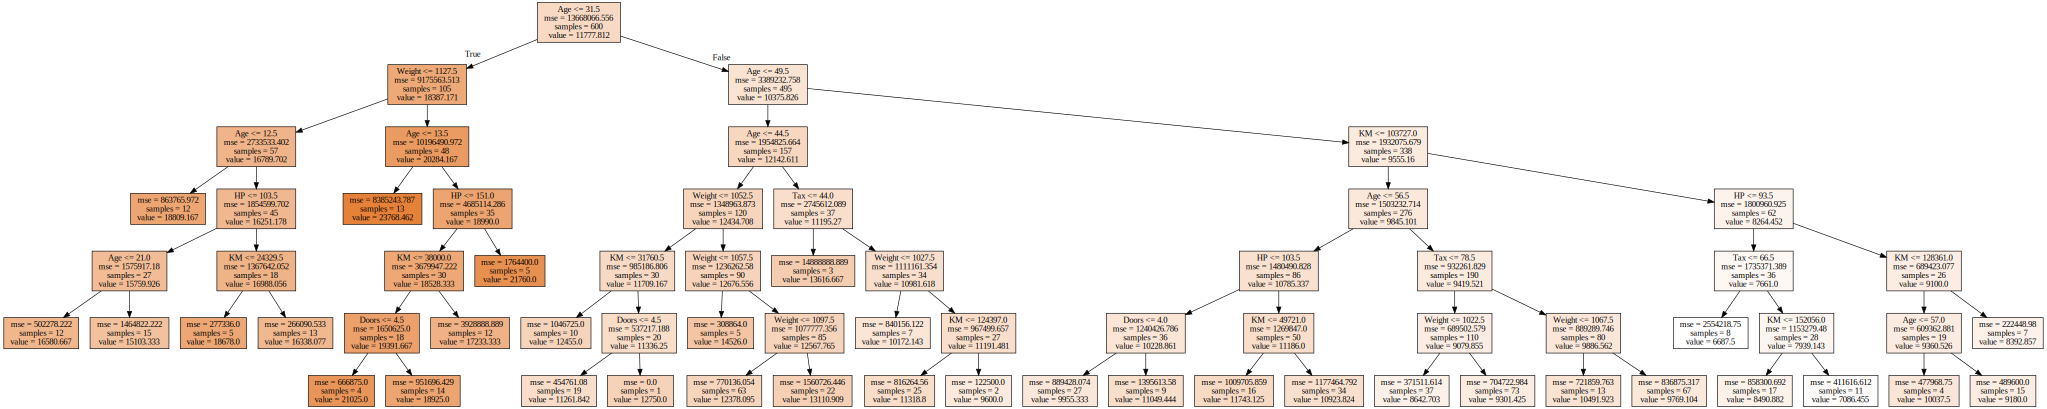

In [96]:
# DOT data
dot_data = export_graphviz(regTree, out_file=None, 
                           feature_names=X.columns,
                           filled=True) # class_name에는 string 형태의 데이터만 가능해서 타입변경 필요

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Random forest & Boosting

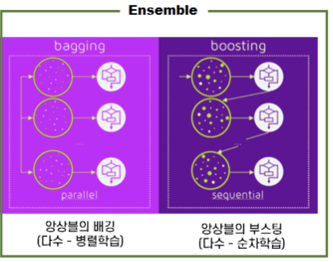

In [102]:
bank_df = pd.read_csv('./data/UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

#### Random forest (Bagging)

Model 선언

In [104]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

Variable importance plot

               feature  importance       std
7   Securities Account    0.003964  0.004998
9               Online    0.006394  0.005350
10          CreditCard    0.007678  0.007053
6             Mortgage    0.034243  0.023469
1           Experience    0.035539  0.016061
0                  Age    0.036258  0.015858
8           CD Account    0.057917  0.043185
3               Family    0.111375  0.053146
4                CCAvg    0.172105  0.103011
5            Education    0.200772  0.101002
2               Income    0.333756  0.129227


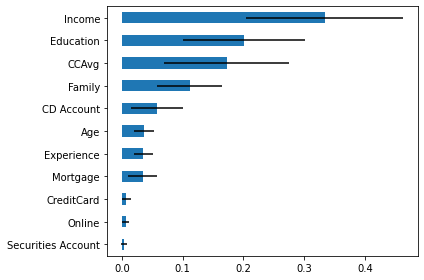

In [105]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

Confusion matrix and metrics

In [108]:
print("accuracy: ", accuracy_score(valid_y, rf.predict(valid_X)))
print("\nconfusion matrix:")
print(confusion_matrix(valid_y, rf.predict(valid_X), labels=[0, 1]))

accuracy:  0.982

confusion matrix:
[[1803    4]
 [  32  161]]


#### XGBoost (Boosting)

In [115]:
boost = GradientBoostingClassifier(n_estimators=500)
boost.fit(train_X, train_y)

GradientBoostingClassifier(n_estimators=500)

In [114]:
print("accuracy: ", accuracy_score(valid_y, boost.predict(valid_X)))
print("\nconfusion matrix:")
print(confusion_matrix(valid_y, boost.predict(valid_X), labels=[0, 1]))

accuracy:  0.985

confusion matrix:
[[1800    7]
 [  23  170]]
